<a href="https://colab.research.google.com/github/olevelychko/labs-Data-Analysis-2023/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Part 1)

In [3]:
df = pd.read_csv('/content/sample_data/bmi_train.csv')
df.head()


Gender  Height  Weight  Index
0   Male     161      89      4
1   Male     179     127      4
2   Male     172     139      5
3   Male     153     104      5
4   Male     165      68      2

In [4]:
x = df
x = df.drop(['Gender'], axis = 1)
y = df['Index']
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [5]:
pca = PCA()
x_pca = pca.fit_transform(x_std)

In [6]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

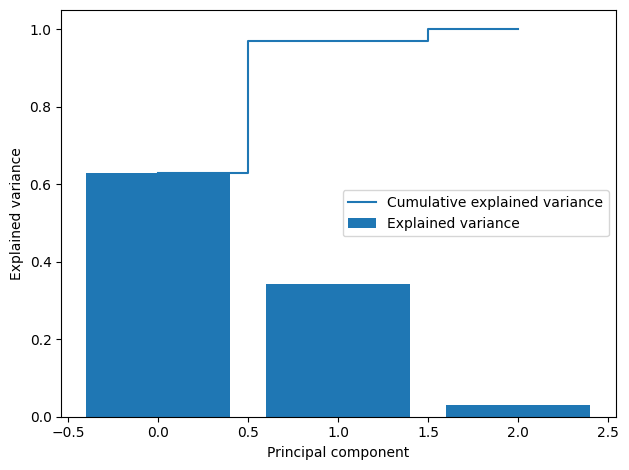

In [7]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

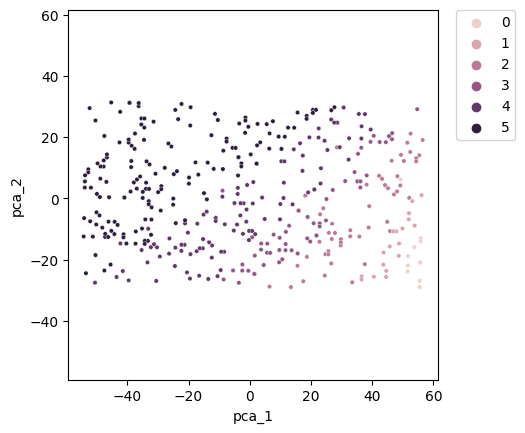

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

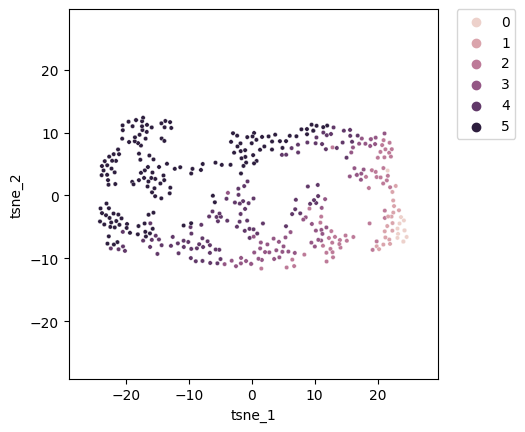

In [9]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Part 2)

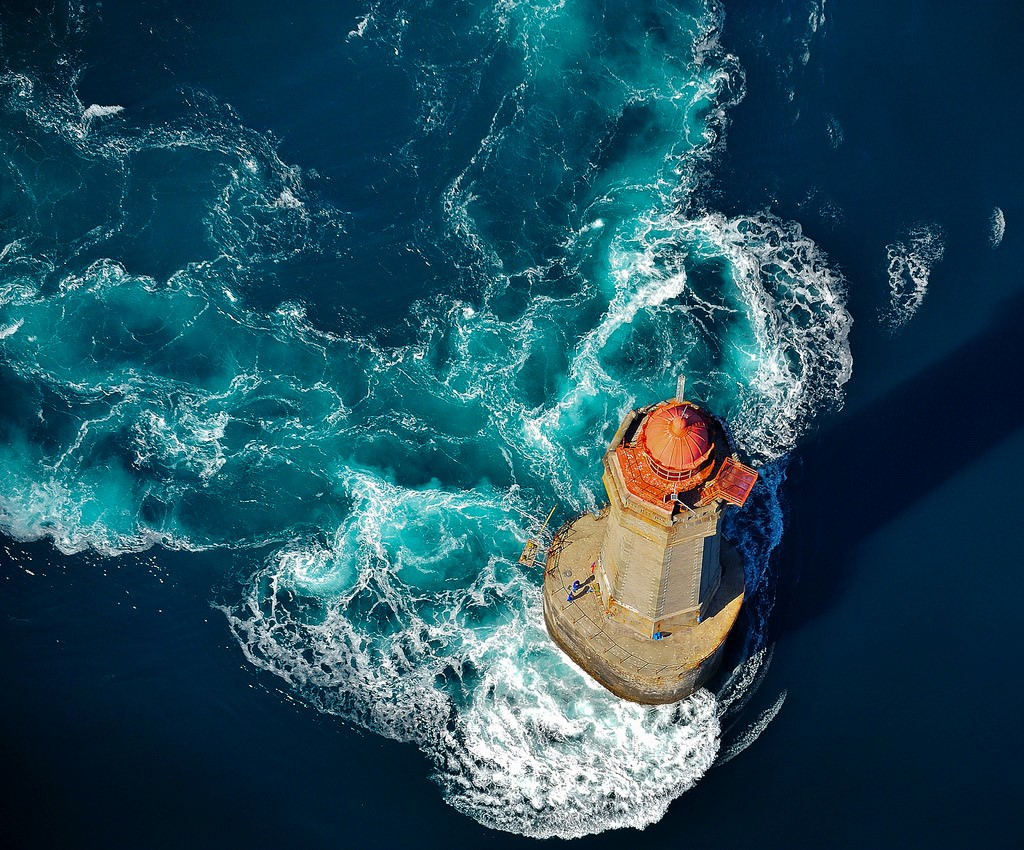

In [11]:
n_colors = 64
LHouse = cv.imread('/content/sample_data/lighthouse.jpg')
cv2_imshow(LHouse)
reshapeLHouse = np.reshape(LHouse, ((LHouse.shape[0] * LHouse.shape[1]), 3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1023.5, 849.5, -0.5)

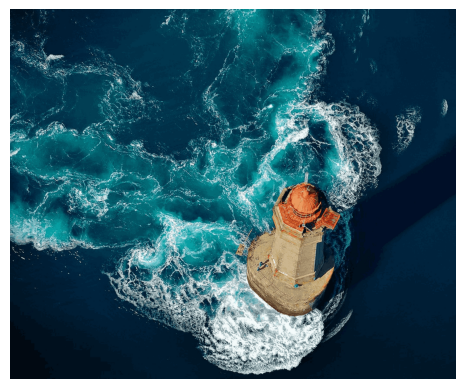

In [12]:
meansLHouse = KMeans(n_clusters=64)
target = meansLHouse.fit_predict(reshapeLHouse)
color_space = meansLHouse.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (LHouse.shape[0], LHouse.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1023.5, 849.5, -0.5)

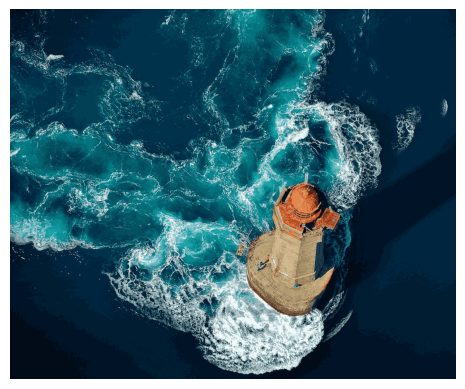

In [13]:
meansLHouse = KMeans(n_clusters=32)
target = meansLHouse.fit_predict(reshapeLHouse)
color_space = meansLHouse.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (LHouse.shape[0], LHouse.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1023.5, 849.5, -0.5)

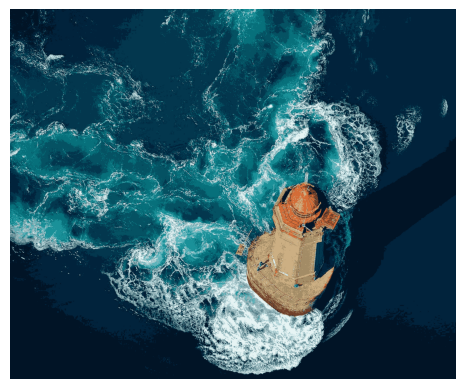

In [14]:
meansLHouse = KMeans(n_clusters=16)
target = meansLHouse.fit_predict(reshapeLHouse)
color_space = meansLHouse.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (LHouse.shape[0], LHouse.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1023.5, 849.5, -0.5)

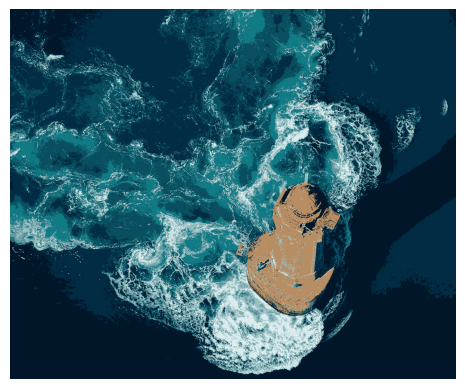

In [15]:
meansLHouse = KMeans(n_clusters=8)
target = meansLHouse.fit_predict(reshapeLHouse)
color_space = meansLHouse.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (LHouse.shape[0], LHouse.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

Part 3)

In [50]:
dfSci = pd.read_csv('/content/sample_data/science.csv')
dfSci.columns

Index(['Id', 'Comment', 'Topic'], dtype='object')

In [51]:
Counter( dfSci['Topic'])

Counter({'Biology': 614, 'Physics': 466, 'Chemistry': 506})

In [52]:
stop_words = set(stopwords.words('english'))
print(dfSci.at[1,'Comment'])
for i in range (len(dfSci)):
  text = dfSci.at[i,'Comment']
  text = text.lower()
  text = re.sub(",@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub(' \w ', ' ', text)
  text = re.sub(' \w{2} ', ' ', text)
  text = re.sub('\s{2,}',' ', text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  dfSci.at[i,'Comment'] = text
print(dfSci.at[1,'Comment'])

I'm skeptical. A heavier lid would be needed to build pressure, while a lighter lid is needed to move a lot with the release of pressure. I feel like I am missing something here.
skeptical heavier lid would needed build pressure lighter lid needed move lot release pressure feel like missing something 


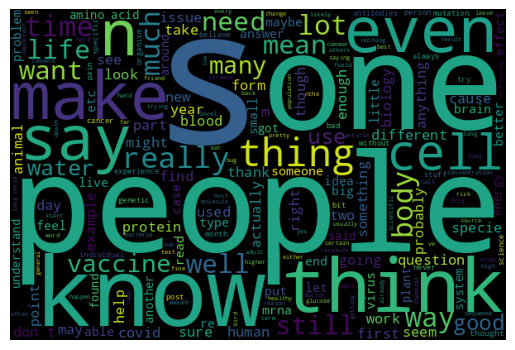

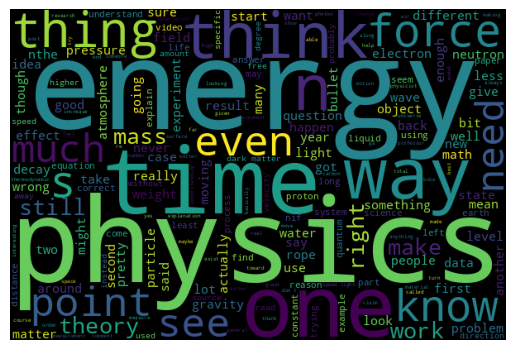

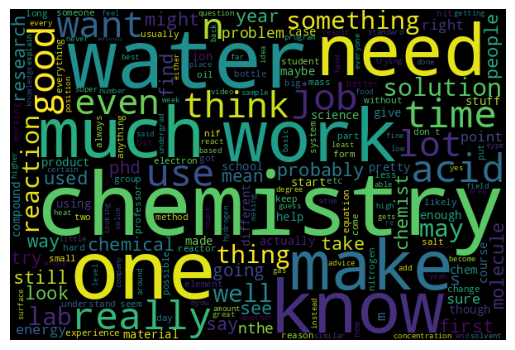

In [53]:
def visualize(label):
    text = ''
    for msg in dfSci[dfSci['Topic'] == label]['Comment']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="black").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Biology')
visualize('Physics')
visualize('Chemistry')

In [54]:
x_train, x_test, y_train, y_test = train_test_split(dfSci['Comment'], dfSci['Topic'], test_size=0.20)
vectorizer = CountVectorizer()
x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [55]:
clf = MultinomialNB(alpha=0.1)
clf.fit(x_train_transformed, y_train)
y_pr = clf.predict(x_test_transformed)
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

     Biology       0.86      0.82      0.84       131
   Chemistry       0.78      0.80      0.79       101
     Physics       0.77      0.79      0.78        86

    accuracy                           0.81       318
   macro avg       0.80      0.81      0.80       318
weighted avg       0.81      0.81      0.81       318



In [56]:
print(confusion_matrix(y_test, y_pr))

[[108  11  12]
 [ 12  81   8]
 [  6  12  68]]


In [57]:
x_train, x_test, y_train, y_test = train_test_split(dfSci['Comment'], dfSci['Topic'], test_size=0.20)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(dfSci['Topic'])
x_train_Tfidf = Tfidf_vect.transform(x_train)
x_test_Tfidf = Tfidf_vect.transform(x_test)

In [58]:
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(x_train_Tfidf, y_train.ravel())
prediction = svc.predict(x_test_Tfidf)

In [59]:
print(confusion_matrix(y_test,prediction))

[[135   0   1]
 [ 83  21   0]
 [ 63   1  14]]
